6


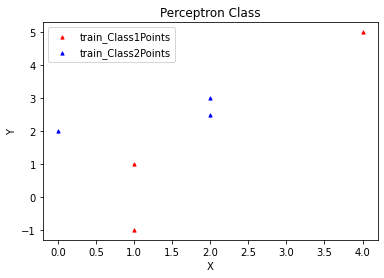

[[ 1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.   -1.    1.   -1.    1.  ]
 [16.   25.   20.    4.    5.    1.  ]
 [-4.   -6.25 -5.   -2.   -2.5  -1.  ]
 [-0.   -4.   -0.   -0.   -2.   -1.  ]
 [-4.   -9.   -6.   -2.   -3.   -1.  ]]
[6]
[6, 92]
[6, 92, 104]
[6, 92, 104, 106]
[6, 92, 104, 106, 93]
[6, 92, 104, 106, 93, 93]
[6, 92, 104, 106, 93, 93, 108]
[6, 92, 104, 106, 93, 93, 108, 115]
[6, 92, 104, 106, 93, 93, 108, 115, 94]
[6, 92, 104, 106, 93, 93, 108, 115, 94, 94]
[102]
[102, 104]
[102, 104, 91]
[102, 104, 91, 116]
[102, 104, 91, 116, 105]
[102, 104, 91, 116, 105, 114]
[102, 104, 91, 116, 105, 114, 91]
[102, 104, 91, 116, 105, 114, 91, 91]
[102, 104, 91, 116, 105, 114, 91, 91, 105]
[102, 104, 91, 116, 105, 114, 91, 91, 105, 93]


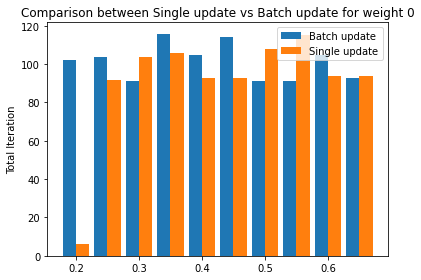

[94]
[94, 94]
[94, 94, 94]
[94, 94, 94, 94]
[94, 94, 94, 94, 94]
[94, 94, 94, 94, 94, 94]
[94, 94, 94, 94, 94, 94, 94]
[94, 94, 94, 94, 94, 94, 94, 94]
[94, 94, 94, 94, 94, 94, 94, 94, 94]
[94, 94, 94, 94, 94, 94, 94, 94, 94, 94]
[105]
[105, 105]
[105, 105, 105]
[105, 105, 105, 105]
[105, 105, 105, 105, 92]
[105, 105, 105, 105, 92, 92]
[105, 105, 105, 105, 92, 92, 92]
[105, 105, 105, 105, 92, 92, 92, 105]
[105, 105, 105, 105, 92, 92, 92, 105, 105]
[105, 105, 105, 105, 92, 92, 92, 105, 105, 92]


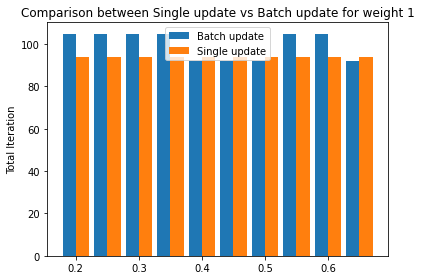

[90]
[90, 90]
[90, 90, 5]
[90, 90, 5, 94]
[90, 90, 5, 94, 98]
[90, 90, 5, 94, 98, 94]
[90, 90, 5, 94, 98, 94, 94]
[90, 90, 5, 94, 98, 94, 94, 90]
[90, 90, 5, 94, 98, 94, 94, 90, 109]
[90, 90, 5, 94, 98, 94, 94, 90, 109, 101]
[109]
[109, 125]
[109, 125, 91]
[109, 125, 91, 104]
[109, 125, 91, 104, 123]
[109, 125, 91, 104, 123, 122]
[109, 125, 91, 104, 123, 122, 124]
[109, 125, 91, 104, 123, 122, 124, 139]
[109, 125, 91, 104, 123, 122, 124, 139, 138]
[109, 125, 91, 104, 123, 122, 124, 139, 138, 149]


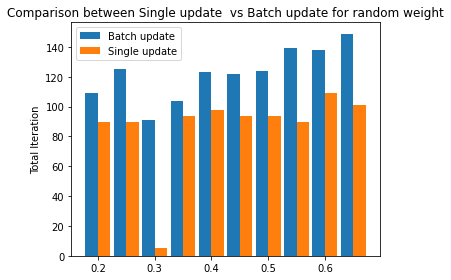

In [19]:
"""
Course name:Pattern Recognition
Course no:Cse-4214
Experiment name_2:“Implementing the Perceptron algorithm for finding the weights of a Linear Discriminant function.” 
Name:Nadia Hossain
Section:A1
ID:16-01-04-024
"""

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rnd;


# ------------task-1-start-----------
data = pd.read_csv('train.txt', sep=" " ,  header = None)
value=data.values
print(len(value))

c1x=[]
c1y=[]
c2x=[]
c2y=[]
y_k=[]
for i in range(len(value)):
    if (value[i][2]==1):
     c1x.append(value[i][0])
     c1y.append(value[i][1])
    else:
     c2x.append(value[i][0])
     c2y.append(value[i][1])

# for plotting training dataset
plt.scatter(c1x, c1y, s=10, color = 'red', marker='^',label='train_Class1Points')#to plot data points on horizontal and vertical axis
plt.scatter(c2x, c2y, s=10, color = 'blue', marker='^',label='train_Class2Points')#to plot data points on horizontal and vertical axis
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Perceptron Class')
plt.legend() #adding the legend to the plot.
plt.show()
# ------------task-1-end----------- 


#----------------TASK-2-START--------------
#------FOR Normalization negating class 2
Y_H_D=[]
for i in range(len(value)):
    if value[i][2] == 1:
        Y_H_D.append(value[i][0] **2)
        Y_H_D.append(value[i][1] **2)
        Y_H_D.append(value[i][0]*value[i][1])
        Y_H_D.append(value[i][0])
        Y_H_D.append(value[i][1])
        Y_H_D.append(1)
        
for i in range(len(value)):
    if value[i][2] == 2:
        Y_H_D.append((value[i][0] **2) * -1)
        Y_H_D.append((value[i][1] **2) * -1)
        Y_H_D.append(value[i][0] *value[i][1] *-1)
        Y_H_D.append(value[i][0] * -1)
        Y_H_D.append(value[i][1] * -1)
        Y_H_D.append(-1)

Y_H_D=np.resize(Y_H_D, (len(value), 6))  
print(Y_H_D)
#---------------TASK-2--END------------------


#------------Task 3 AND Task 4 start-------
#single update for initial weight 1

to_it=[]     #total iteration
learning_rate=.1
limit=500
while True:
  init_w=[1,1,1,1,1,1] # initial weght 1
  counter=0
  n=0
  for i in range(limit):
    n=n+1
    sum_w=[0,0,0,0,0,0]
    counter=0
    for j in range(len(value)):
      g=np.dot(Y_H_D[j,:],init_w)    #decision boundary for perceptron,if g<=0 then missclassified and update weight
      if g <= 0: 
        sum_w = init_w+learning_rate*Y_H_D[j,:]
        init_w=sum_w
        #counter=0
      else:
        counter=counter+1
        
    
    if counter==len(value):
             break
             
  to_it.append(i+1)

      
  learning_rate += .1
  print(to_it)
  if learning_rate>1:
             break



#batch update process for initial weight 1

total_it=[]
learning_rate=.1
while True:
  init_w=[1,1,1,1,1,1]    # initial weight 1
  for i in range(limit):
    counter=0
    sum_w=[0,0,0,0,0,0]
    for j in range(len(value)):
      g=np.dot(Y_H_D[j,:],init_w)
      if g <= 0:
        sum_w +=learning_rate*Y_H_D[j,:]
      else:
        counter=counter+1
    
    init_w=sum_w+init_w
    if counter==len(value):
             break
  total_it.append(i+1)
      
  learning_rate += .1
  print(total_it)
  if learning_rate>1:
             break
# plotting berchart for  sigle update and batch update  for inital weight 1
to_label = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1']

x = np.arange(len(to_label))  
width = 0.42  

fig, axes = plt.subplots()
rects1 = axes.bar(x - width/2, total_it, width, label='Batch update ')
rects2 = axes.bar(x + width/2, to_it, width, label='Single update')
axes.set_ylabel('Total Iteration')
axes.set_title('Comparison between Single update vs Batch update for weight 0')
axes.set_xticklabels(to_label)
axes.legend()

fig.tight_layout()
plt.show()
#------------------

#single update for initial weight 0

to_it0=[]     #total iteration
learning_rate=.1
limit=500
while True:
  init_w=[0,0,0,0,0,0] # initial weght 0
  counter=0
  n=0
  for i in range(limit):
    n=n+1
    sum_w=[0,0,0,0,0,0]
    counter=0
    for j in range(len(value)):
      g=np.dot(Y_H_D[j,:],init_w)    
      if g <= 0: 
        sum_w = init_w+learning_rate*Y_H_D[j,:]
        init_w=sum_w
        #counter=0
      else:
        counter=counter+1
        
    
    if counter==len(value):
             break
             
  to_it0.append(i+1)

      
  learning_rate += .1
  print(to_it0)
  if learning_rate>1:
             break
#batch update for initial weight 0
total_it0=[]
learning_rate=.1
while True:
  init_w=[0,0,0,0,0,0]
  for i in range(700):
    counter=0
    sum_w=[0,0,0,0,0,0]
    for j in range(len(value)):
      g=np.dot(Y_H_D[j,:],init_w)
      if g <= 0:
        sum_w +=learning_rate*Y_H_D[j,:]
      else:
        counter=counter+1
    
    init_w=sum_w+init_w
    if counter==len(value):
             break
  total_it0.append(i+1)
      
  learning_rate += .1
  print(total_it0)
  if learning_rate>1:
             break

# plotting berchart for  sigle update and batch update  for inital weight 1

to_label = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1']

x = np.arange(len(to_label))  
width = 0.42 

fig, axes = plt.subplots()
rects1 = axes.bar(x - width/2, total_it0, width, label='Batch update')
rects2 = axes.bar(x + width/2, to_it0, width, label='Single update')
axes.set_ylabel('Total Iteration')
axes.set_title('Comparison between Single update vs Batch update for weight 1')
axes.set_xticklabels(to_label)
axes.legend()
fig.tight_layout()
plt.show()


# single update for initial wweight random value
to_it_rand=[]
learning_rate=.1
while True:

  np.random.seed(123)
  w_r= np.random.random(np.array(6))
  init_w=w_r
  counter=0
  n=0
  for i in range(700):
    n=n+1
    sum_w=[0,0,0,0,0,0]
    counter=0
    for j in range(len(value)):
      g=np.dot(Y_H_D[j,:],init_w)
      if g <= 0:
        sum_w = init_w+learning_rate*Y_H_D[j,:]
        init_w=sum_w
        #counter=0
      else:
        counter=counter+1
        
    
    if counter==len(value):
             break
             
  to_it_rand.append(i+1)

      
  learning_rate += .1
  print(to_it_rand)
  if learning_rate>1:
             break

#batch update for inital weight random value
total_it_rand=[]
learning_rate=.1
while True:
  np.random.seed(123)
  w_r= np.random.random(np.array(6))
  init_w=w_r
  for i in range(700):
    counter=0
    sum_w=[0,0,0,0,0,0]
    for j in range(len(value)):
      g=np.dot(Y_H_D[j,:],init_w)
      if g <= 0:
        sum_w +=learning_rate*Y_H_D[j,:]
      else:
        counter=counter+1
    
    init_w=sum_w+init_w
    if counter==len(value):
             break
  total_it_rand.append(i+1)
      
  learning_rate += .1
  print(total_it_rand)
  if learning_rate>1:
             break
# plotting berchart for  sigle update and batch update  for inital weight random
to_label = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1']

x = np.arange(len(to_label))  
width = 0.44  
fig, axes = plt.subplots()
rects1 = axes.bar(x - width/2, total_it_rand, width, label='Batch update')
rects2 = axes.bar(x + width/2, to_it_rand, width, label='Single update')
axes.set_ylabel('Total Iteration')
axes.set_title('Comparison between Single update  vs Batch update for random weight')
axes.set_xticklabels(to_label)
axes.legend()
fig.tight_layout()
plt.show()
